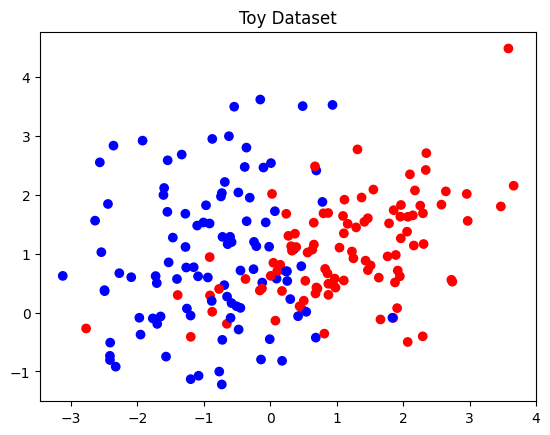

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate binary classification dataset
X, y = make_classification(n_samples=200, n_features=2, 
                           n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, random_state=42)


y = y.reshape(-1, 1)

plt.scatter(X[:,0], X[:,1], c=y[:,0], cmap='bwr')
plt.title("Toy Dataset")
plt.show()


In [6]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function (binary cross-entropy)
def compute_loss(y, y_hat):
    m = y.shape[0]
    return - (1/m) * np.sum(y*np.log(y_hat+1e-9) + (1-y)*np.log(1-y_hat+1e-9))

# Training function
def train(X, y, lr=0.1, epochs=1000):
    m, n = X.shape
    W = np.zeros((n, 1))
    b = 0
    
    losses = []
    for i in range(epochs):
        # Forward pass
        Z = np.dot(X, W) + b
        A = sigmoid(Z)
        
        # Loss
        loss = compute_loss(y, A)
        losses.append(loss)
        
        # Gradients
        dW = (1/m) * np.dot(X.T, (A - y))
        db = (1/m) * np.sum(A - y)
        
        # Update
        W -= lr * dW
        b -= lr * db
        
    return W, b, losses

# Train model
W, b, losses = train(X, y, lr=0.1, epochs=1000)

print("Learned Weights:", W.ravel())
print("Learned Bias:", b)


Learned Weights: [ 1.94358239 -0.45303836]
Learned Bias: 0.21262408064731206


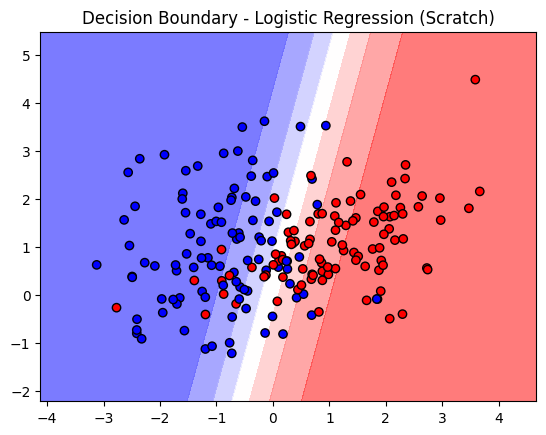

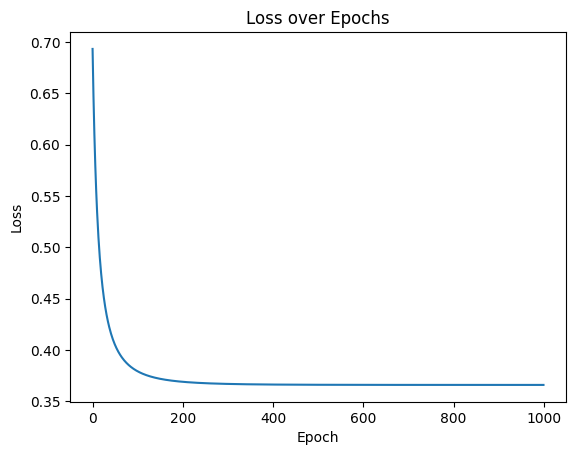

In [ ]:
#plot decision boundary

def plot_decision_boundary(X, y, W, b):
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = sigmoid(np.dot(grid, W) + b).reshape(xx.shape)
    
    plt.contourf(xx, yy, probs, alpha=0.6, cmap='bwr')
    plt.scatter(X[:,0], X[:,1], c=y[:,0], cmap='bwr', edgecolors='k')
    plt.title("Decision Boundary - Logistic Regression (Scratch)")
    plt.show()

plot_decision_boundary(X, y, W, b)

# Plot loss curve
plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


In [ ]:
# compare with sklearn implementation

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Our model predictions
y_hat = sigmoid(np.dot(X, W) + b)
y_pred = (y_hat > 0.5).astype(int)

print("Accuracy (Scratch):", accuracy_score(y, y_pred))

# Sklearn Logistic Regression
clf = LogisticRegression()
clf.fit(X, y.ravel())
y_pred_sklearn = clf.predict(X)

print("Accuracy (sklearn):", accuracy_score(y, y_pred_sklearn))


Accuracy (Scratch): 0.84
Accuracy (sklearn): 0.84
